## Modeling The Data ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import numpy as np
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv('./data/EDA.csv')

In [3]:
df.head()
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [5]:
train,test = train_test_split(df)
print(len(train), len(test))
train.head()

13236 4412


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,month_sold_11,month_sold_12,month_sold_2,month_sold_3,month_sold_4,month_sold_5,month_sold_6,month_sold_7,month_sold_8,month_sold_9
6561,345000.0,3,2.50,2340,8414,1.0,0.0,3,7,1280,...,0,0,0,0,0,0,0,0,0,0
2860,557500.0,3,2.25,1820,9670,2.0,0.0,3,8,1820,...,0,0,0,0,0,0,0,1,0,0
6735,410000.0,3,1.75,2160,4000,1.0,0.0,3,7,1080,...,0,0,0,0,1,0,0,0,0,0
2487,200000.0,4,2.00,2090,6630,1.0,0.0,3,7,1070,...,0,0,0,0,0,0,0,1,0,0
15796,450000.0,2,1.00,1180,10720,1.0,0.0,4,7,1180,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'Geo_Clusters_1', 'Geo_Clusters_2',
       'Geo_Clusters_3', 'Geo_Clusters_4', 'Geo_Clusters_5', 'Geo_Clusters_6',
       'year_renovated_11', 'year_renovated_12', 'year_renovated_3',
       'year_renovated_4', 'year_renovated_5', 'year_renovated_6',
       'year_renovated_7', 'year_renovated_8', 'year_renovated_9',
       'waterfront_1', 'year_built_1', 'year_built_10', 'year_built_11',
       'year_built_2', 'year_built_3', 'year_built_4', 'year_built_5',
       'year_built_6', 'year_built_7', 'year_built_8', 'year_built_9',
       'year_built_nan', 'month_sold_10', 'month_sold_11', 'month_sold_12',
       'month_sold_2', 'month_sold_3', 'month_sold_4', 'month_sold_5',
       'month_sold_6', 'month_sold_7', 'month_sold_8', 'month_sold_9'],
      dtype='object')

In [7]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     608.7
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:59:08   Log-Likelihood:            -1.7542e+05
No. Observations:               13236   AIC:                         3.509e+05
Df Residuals:                   13184   BIC:                         3.513e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.965e+05   2.18e+04    -13.602      0.000   -3.39e+05   -2.54e+05
bedrooms          -1.348e+04   2006.872     -6.716      0.000   -1.74e+04   -9543.419
bathrooms          2.814e+04   3104.366      9.065      0.000    2.21e+04    3.42e+04
sqft_living         101.9874     19.033      5.358      0.000      64.680     139.295
sqft_lot             -1.7827      0.867     -2.055      0.040      -3.483      -0.082
floors             1130.7634   3844.099      0.294      0.769   -6404.223    8665.750
view               4.944e+04   2126.942     23.246      0.000    4.53e+04    5.36e+04
condition           3.49e+04   2115.919     16.495      0.000    3.08e+04     3.9e+04
grade              9.261e+04   2050.792     45.158      0.000    8.86e+04    9.66e+04
sqft_above            4.6993     18.998      0.247      0.805     -32.540      41.939
sqft_basement        -5.7713     18.794     -0.307      0.759     -42.611      31.068
sqft_living15        45.1063      3.596     12.542      0.000      38.057      52.156
sqft_lot15           -2.1998      0.873     -2.520      0.012      -3.911      -0.489
Geo_Clusters_1    -1.085e+05   4499.804    -24.111      0.000   -1.17e+05   -9.97e+04
Geo_Clusters_2    -5217.4278   4554.198     -1.146      0.252   -1.41e+04    3709.456
Geo_Clusters_3    -2.096e+05   5812.914    -36.053      0.000   -2.21e+05   -1.98e+05
Geo_Clusters_4    -1.066e+05   4879.796    -21.850      0.000   -1.16e+05   -9.71e+04
Geo_Clusters_5    -2.358e+05   4893.975    -48.175      0.000   -2.45e+05   -2.26e+05
Geo_Clusters_6     -9.16e+04   6159.330    -14.872      0.000   -1.04e+05   -7.95e+04
year_renovated_11 -4.338e+04    1.9e+04     -2.279      0.023   -8.07e+04   -6071.942
year_renovated_12  -1.07e+05   1.28e+04     -8.369      0.000   -1.32e+05   -8.19e+04
year_renovated_3  -2.141e+05   9.88e+04     -2.167      0.030   -4.08e+05   -2.04e+04
year_renovated_4  -1.587e+05    5.8e+04     -2.735      0.006   -2.72e+05    -4.5e+04
year_renovated_5  -1.807e+05    4.8e+04     -3.764      0.000   -2.75e+05   -8.66e+04
year_renovated_6  -1.903e+05   3.15e+04     -6.037      0.000   -2.52e+05   -1.29e+05
year_renovated_7  -1.276e+05   2.94e+04     -4.335      0.000   -1.85e+05   -6.99e+04
year_renovated_8   -1.22e+05   2.08e+04     -5.859      0.000   -1.63e+05   -8.12e+04
year_renovated_9  -3.673e+04      2e+04     -1.838      0.066   -7.59e+04    2432.850
waterfront_1        5.29e+05   2.66e+04     19.892      0.000    4.77e+05    5.81e+05
year_built_1      -1439.6559   8882.714     -0.162      0.871   -1.89e+04     1.6e+04
year_built_10     -1.903e+05   8279.544    -22.984      0.000   -2.07e+05   -1.74e+05
year_built_11     -1.546e+05   9355.617    -16.525      0.000   -1.73e+05   -1.36e+05
year_built_2      -1.949e+04   8106.711     -2.404      0.016   -3.54e+04

In [8]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

52 35
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-2.965e+05,2.18e+04,-13.602,0.00,-3.39e+05,-2.54e+05
bedrooms,-1.348e+04,2006.872,-6.716,0.00,-1.74e+04,-9543.419
bathrooms,2.814e+04,3104.366,9.065,0.00,2.21e+04,3.42e+04
sqft_living,101.9874,19.033,5.358,0.00,64.680,139.295
sqft_lot,-1.7827,0.867,-2.055,0.04,-3.483,-0.082


In [9]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     884.9
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:59:08   Log-Likelihood:            -1.7543e+05
No. Observations:               13236   AIC:                         3.509e+05
Df Residuals:                   13200   BIC:                         3.512e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.203e+05   1.82e+04    -17.570      0.000   -3.56e+05   -2.85e+05
bedrooms          -1.309e+04   2003.155     -6.534      0.000    -1.7e+04   -9161.655
bathrooms          2.702e+04   3032.747      8.910      0.000    2.11e+04     3.3e+04
sqft_living         102.4973      3.596     28.501      0.000      95.448     109.547
sqft_lot             -1.5561      0.853     -1.824      0.068      -3.229       0.116
view               4.865e+04   2098.103     23.189      0.000    4.45e+04    5.28e+04
condition          3.467e+04   2108.230     16.444      0.000    3.05e+04    3.88e+04
grade              9.329e+04   1994.329     46.778      0.000    8.94e+04    9.72e+04
sqft_living15        46.8225      3.510     13.339      0.000      39.942      53.703
sqft_lot15           -2.0951      0.870     -2.409      0.016      -3.800      -0.390
Geo_Clusters_1     -1.05e+05   3860.863    -27.183      0.000   -1.13e+05   -9.74e+04
Geo_Clusters_3    -2.059e+05   5361.553    -38.394      0.000   -2.16e+05   -1.95e+05
Geo_Clusters_4    -1.032e+05   3483.079    -29.625      0.000    -1.1e+05   -9.64e+04
Geo_Clusters_5    -2.325e+05   4303.529    -54.021      0.000   -2.41e+05   -2.24e+05
Geo_Clusters_6    -8.709e+04   5697.393    -15.286      0.000   -9.83e+04   -7.59e+04
year_renovated_11 -2.966e+04   1.74e+04     -1.703      0.089   -6.38e+04    4476.434
year_renovated_12  -9.44e+04   1.02e+04     -9.261      0.000   -1.14e+05   -7.44e+04
year_renovated_3  -2.067e+05   9.84e+04     -2.100      0.036      -4e+05   -1.38e+04
year_renovated_4  -1.448e+05   5.75e+04     -2.519      0.012   -2.57e+05   -3.21e+04
year_renovated_5  -1.658e+05   4.73e+04     -3.504      0.000   -2.59e+05    -7.3e+04
year_renovated_6  -1.779e+05   3.06e+04     -5.821      0.000   -2.38e+05   -1.18e+05
year_renovated_7  -1.123e+05   2.84e+04     -3.955      0.000   -1.68e+05   -5.67e+04
year_renovated_8  -1.069e+05   1.93e+04     -5.529      0.000   -1.45e+05    -6.9e+04
waterfront_1       5.281e+05   2.66e+04     19.874      0.000    4.76e+05     5.8e+05
year_built_10     -1.853e+05   6463.134    -28.672      0.000   -1.98e+05   -1.73e+05
year_built_11     -1.496e+05   7803.481    -19.174      0.000   -1.65e+05   -1.34e+05
year_built_2      -2.061e+04   6544.632     -3.150      0.002   -3.34e+04   -7783.989
year_built_3      -4.221e+04   8550.784     -4.937      0.000    -5.9e+04   -2.55e+04
year_built_4      -6.817e+04   5983.727    -11.392      0.000   -7.99e+04   -5.64e+04
year_built_5      -9.717e+04   5935.552    -16.370      0.000   -1.09e+05   -8.55e+04
year_built_6      -1.373e+05   6172.371    -22.239      0.000   -1.49e+05   -1.25e+05
year_built_7      -1.706e+05   6452.959    -26.436      0.000   -1.83e+05   -1.58e+05
year_built_8      -1.685e+05   6770.206    -24.884      0.000   -1.82e+05

In [10]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors 
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     313.6
Date:                Tue, 02 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:59:08   Log-Likelihood:                -58556.
No. Observations:                4412   AIC:                         1.172e+05
Df Residuals:                    4376   BIC:                         1.174e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.125e+05   3.17e+04    -12.999      0.000   -4.75e+05    -3.5e+05
bedrooms          -2.188e+04   3472.854     -6.301      0.000   -2.87e+04   -1.51e+04
bathrooms          2.152e+04   5459.866      3.942      0.000    1.08e+04    3.22e+04
sqft_living         123.4946      6.622     18.650      0.000     110.513     136.476
sqft_lot             -3.5649      1.557     -2.289      0.022      -6.618      -0.512
view               4.751e+04   3697.330     12.850      0.000    4.03e+04    5.48e+04
condition          3.289e+04   3756.236      8.757      0.000    2.55e+04    4.03e+04
grade              1.048e+05   3451.347     30.366      0.000     9.8e+04    1.12e+05
sqft_living15        39.5108      6.228      6.344      0.000      27.301      51.720
sqft_lot15           -1.1101      1.580     -0.703      0.482      -4.208       1.988
Geo_Clusters_1    -9.692e+04   6883.086    -14.081      0.000    -1.1e+05   -8.34e+04
Geo_Clusters_3    -1.976e+05   9409.781    -20.998      0.000   -2.16e+05   -1.79e+05
Geo_Clusters_4    -9.812e+04   6208.432    -15.804      0.000    -1.1e+05   -8.59e+04
Geo_Clusters_5    -2.281e+05   7407.331    -30.793      0.000   -2.43e+05   -2.14e+05
Geo_Clusters_6    -8.731e+04   9874.632     -8.842      0.000   -1.07e+05    -6.8e+04
year_renovated_11  4.094e+04   3.38e+04      1.212      0.226   -2.53e+04    1.07e+05
year_renovated_12 -5.884e+04   1.81e+04     -3.244      0.001   -9.44e+04   -2.33e+04
year_renovated_3  -2.409e+04   1.42e+05     -0.169      0.866   -3.03e+05    2.55e+05
year_renovated_4  -6.854e+04   1.43e+05     -0.481      0.631   -3.48e+05    2.11e+05
year_renovated_5  -1.475e+05   7.32e+04     -2.014      0.044   -2.91e+05   -3942.158
year_renovated_6  -1.166e+05   6.05e+04     -1.927      0.054   -2.35e+05    2010.286
year_renovated_7  -8.488e+04   7.31e+04     -1.160      0.246   -2.28e+05    5.85e+04
year_renovated_8  -8.581e+04    3.8e+04     -2.256      0.024    -1.6e+05   -1.12e+04
waterfront_1       2.791e+05    4.2e+04      6.637      0.000    1.97e+05    3.61e+05
year_built_10     -1.978e+05   1.09e+04    -18.075      0.000   -2.19e+05   -1.76e+05
year_built_11     -1.618e+05   1.37e+04    -11.843      0.000   -1.89e+05   -1.35e+05
year_built_2      -1.573e+04   1.11e+04     -1.415      0.157   -3.75e+04    6070.631
year_built_3      -2.416e+04   1.48e+04     -1.637      0.102   -5.31e+04    4775.492
year_built_4      -6.824e+04   1.08e+04     -6.311      0.000   -8.94e+04    -4.7e+04
year_built_5      -8.843e+04   1.04e+04     -8.532      0.000   -1.09e+05   -6.81e+04
year_built_6      -1.216e+05    1.1e+04    -11.102      0.000   -1.43e+05      -1e+05
year_built_7      -1.671e+05   1.13e+04    -14.795      0.000   -1.89e+05   -1.45e+05
year_built_8      -1.703e+05   1.18e+04    -14.385      0.000   -1.94e+05

In [11]:
y = df[['price']]
X = df[x_cols]

In [12]:
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model_test = linreg.fit(X_train, y_train)

y_hat_train = model_test.predict(X_train)
y_hat_test = model_test.predict(X_test)

In [14]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [15]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

R_squared = model_test.score(X_test, y_test)
print('This iteration has an R-squared value of:', R_squared)

Train Mean Squarred Error: 18791614497.357143
Test Mean Squarred Error: 21447387380.8559
This iteration has an R-squared value of: 0.6957388077142725


(array([3.000e+00, 4.000e+00, 1.400e+01, 5.600e+01, 1.230e+02, 3.940e+02,
        4.034e+03, 8.376e+03, 1.086e+03, 2.800e+01]),
 array([-1411998.34430151, -1215714.59590832, -1019430.84751512,
         -823147.09912192,  -626863.35072873,  -430579.60233553,
         -234295.85394234,   -38012.10554914,   158271.64284406,
          354555.39123725,   550839.13963045]),
 <a list of 10 Patch objects>)

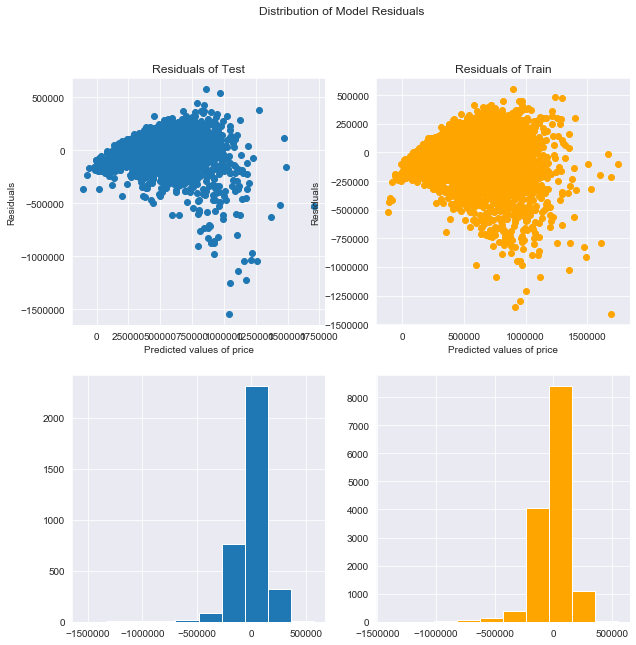

In [23]:
#Residuals check
#Define residuals as predicted less observed
residuals_train = y_hat_train - y_train
residuals_test = y_hat_test - y_test

fig = plt.figure(figsize=(10,10))
fig.suptitle("Distribution of Model Residuals")

ax1 = fig.add_subplot(2,2,1) #Scatterplot of test residuals
ax1.scatter(x=y_hat_test, y=residuals_test)
ax1.set_title('Residuals of Test')
ax1.set_xlabel('Predicted values of price')
ax1.set_ylabel('Residuals')

ax2 = fig.add_subplot(2,2,2) #Scatterplot of train residuals
ax2.scatter(x=y_hat_train, y=residuals_train, c='orange')
ax2.set_title('Residuals of Train')
ax2.set_xlabel('Predicted values of price')
ax2.set_ylabel('Residuals')

ax3 = fig.add_subplot(2,2,3) #Histogram of test residuals
ax3.hist(residuals_test) 

ax4 = fig.add_subplot(2,2,4) #Histogram of train residuals
ax4.hist(residuals_train, color='orange')

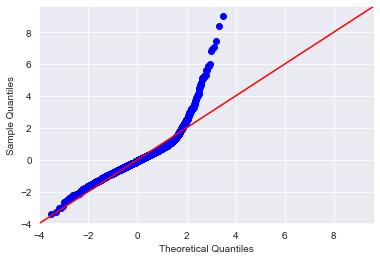

In [21]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)